<a href="https://colab.research.google.com/github/Lissiu/scNET/blob/main/%E2%80%9C%E2%80%9CscNET_protein_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **scNET: Learning Context-Specific Gene and Cell Embeddings by Integrating Single-Cell Gene Expression Data with Protein-Protein Interaction Information**

**Install scnet using pip**

**It may be necessary to restart (not delete) the runtime after installing scNET in Google Colab. We are working on fixing this issue in future releases.**

In [1]:
!pip install scnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.6/766.6 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 785.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56

# Import scNET and model traning

In [1]:
import scNET
import scanpy as sc

#For faster processing in medium to large datasets (e.g. 30K or above cells), the maximum cells batch size can be increased depending on the available GPU memory.

#For GPU with 24GB memory
#scNET.main.MAX_CELLS_BATCH_SIZE = 3000

#for GPU with 40GB memory
#scNET.main.MAX_CELLS_BATCH_SIZE = 4000

#For GPU with 80GB memory or more
#scNET.main.MAX_CELLS_BATCH_SIZE = 8000

#otherwize, do not change the default value

In [2]:
#To control the cutoff of gene expression, the minimum precetage of cells expressing a gene can be adjusted. The default all expressed genes are considered.
#For example, to consider genes expressed in at least 5% of cells
scNET.main.EXPRESSION_CUTOFF = 0.05

In [3]:
#For larger dataset (10K or above), containing larger number of subcommunities, the number of encoder layers could be increased to 4 or more. the default value is 3.
scNET.main.NUM_LAYERS = 2

In [4]:
#To control the number of deifferentially expressed genes, the default value is 2000
#For example, to consider 3500 DE genes
scNET.main.DE_GENES_NUM = 1500


In [5]:
!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 --index-url https://download.pytorch.org/whl/cu118
!pip install torch_geometric torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.0.1+cu118.html

Found existing installation: torch 2.6.0
Uninstalling torch-2.6.0:
  Successfully uninstalled torch-2.6.0
Found existing installation: torchvision 0.24.0+cu126
Uninstalling torchvision-0.24.0+cu126:
  Successfully uninstalled torchvision-0.24.0+cu126
Found existing installation: torchaudio 2.9.0+cu126
Uninstalling torchaudio-2.9.0+cu126:
  Successfully uninstalled torchaudio-2.9.0+cu126
Looking in indexes: https://download.pytorch.org/whl/cu118
ERROR: Could not find a version that satisfies the requirement torch==2.0.1 (from versions: 2.2.0+cu118, 2.2.1+cu118, 2.2.2+cu118, 2.3.0+cu118, 2.3.1+cu118, 2.4.0+cu118, 2.4.1+cu118, 2.5.0+cu118, 2.5.1+cu118, 2.6.0+cu118, 2.7.0+cu118, 2.7.1+cu118)
ERROR: No matching distribution found for torch==2.0.1
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 5.0 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ e

## run_scNET arguments:
 **obj (AnnData, optional):** AnnData obj.

  **pre_processing_flag (bool, optional):** If True, perform pre-processing steps.

  **human_flag (bool, optional):** Controls gene name casing in the network.

  **number_of_batches (int, optional):** Number of mini-batches for the training.

  **split_cells (bool, optional):** If True, split by cells instead of edges during training. If using A100 could be True (for 10K cells or less)

  **n_neighbors (int, optional):** Number of neighbors for building the adjacency graph.

  **max_epoch (int, optional):** Max number of epochs for model training (recommended 250-300, and for larger dataset consider also 300-350).

  **model_name (str, optional):** Identifier for saving the model outputs.
  
  **save_model_flag (bool, optional):** If True, save the trained model.

In [10]:
import pandas as pd
import numpy as np

# ===== 1. 读原始 TS_SCP 文件 =====
ts_file = "1_20240824_TS_SCP_filtered.txt"  # 如果路径不一样改这里
df = pd.read_csv(ts_file, sep="\t")

print("原始形状:", df.shape)
print("前几列:\n", df.columns[:8])

# ===== 2. 找出表达列（.d 结尾的列就是每个单细胞） =====
expr_cols = [c for c in df.columns if c.endswith(".d")]
print("检测到的细胞数量:", len(expr_cols))

# ===== 3. 去掉没有基因名的行 =====
df = df[~df["Genes"].isna()].copy()

# ===== 4. 处理一行多个基因的情况 =====
# 例： "GATD3;GATD3B" -> 只取第一个 GATD3 作为主基因
df["gene_primary"] = (
    df["Genes"]
      .astype(str)
      .str.split(";")
      .str[0]
      .str.strip()
)

df = df[df["gene_primary"] != ""].copy()
print("有主基因名的行数:", df.shape[0])

# ===== 5. 一个基因可能对应多个 protein group：按 max 合并到一个基因 =====
expr_gene = (
    df.groupby("gene_primary")[expr_cols]
      .max()
)

print("按基因聚合后的矩阵形状 (基因 × 细胞):", expr_gene.shape)

# ===== 6. 清洗：缺失值 -> 0，去掉全 0 基因 =====
expr_gene = expr_gene.replace([np.inf, -np.inf], np.nan).fillna(0.0)
expr_gene = expr_gene.loc[expr_gene.sum(axis=1) > 0, :]
print("去掉全 0 基因后形状:", expr_gene.shape)





原始形状: (6587, 129)
前几列:
 Index(['Protein.Group', 'Protein.Ids', 'Protein.Names', 'Genes',
       'First.Protein.Description',
       'D:\LucyC\20240814_Terry\Lucy_Terry_h3.1_plate1_2_8-20-2024_Slot1-194_7437.d',
       'D:\LucyC\20240814_Terry\Lucy_Terry_h3.1_plate1_2_8-20-2024_Slot1-195_7438.d',
       'D:\LucyC\20240814_Terry\Lucy_Terry_h3.1_plate1_2_8-20-2024_Slot1-196_7439.d'],
      dtype='object')
检测到的细胞数量: 124
有主基因名的行数: 6586
按基因聚合后的矩阵形状 (基因 × 细胞): (6582, 124)
去掉全 0 基因后形状: (5330, 124)


In [11]:
# ===== 7. log2 转换（蛋白强度 → log 表达）=====
expr_log = np.log2(expr_gene + 1.0)
expr_log.shape



(5330, 124)

In [12]:
# ===== 8. 载入 scNET 的 PPI 网络，找共同基因 =====
import os

import pandas as pd

fmt_path = "/usr/local/lib/python3.12/dist-packages/scNET/Data/format_h_sapiens.csv"
print("PPI 网络文件是否存在:", os.path.exists(fmt_path))

fmt = pd.read_csv(fmt_path)
print("PPI 网络前几行:\n", fmt.head())
print("列名:", fmt.columns.tolist())

# PPI 网络里所有出现过的基因名（g1_symbol + g2_symbol 的并集）
ppi_genes = pd.unique(
    pd.concat([fmt["g1_symbol"], fmt["g2_symbol"]]).astype(str).str.upper()
)

# 我们表达矩阵里的基因名
genes_upper = pd.Series(
    expr_log.index.astype(str).str.upper(),
    index=expr_log.index
)

# 交集：既在我们数据里、又在 PPI 网络里的基因
genes_to_keep = genes_upper[genes_upper.isin(ppi_genes)].index
print("与 PPI 网络重叠的基因数:", len(genes_to_keep))

# 只保留这些基因
expr_log_ppi = expr_log.loc[genes_to_keep]
print("过滤后矩阵形状:", expr_log_ppi.shape)



PPI 网络文件是否存在: True
PPI 网络前几行:
    Unnamed: 0 g1_symbol g2_symbol      conn
0           0      A1BG     ANXA7  0.108084
1          29       A2M     ANXA7  0.108084
2        3014      ACTB     ANXA7  0.108084
3       12454    ANGPT2     ANXA7  0.108084
4       13850     ANXA4     ANXA7  0.420191
列名: ['Unnamed: 0', 'g1_symbol', 'g2_symbol', 'conn']
与 PPI 网络重叠的基因数: 5281
过滤后矩阵形状: (5281, 124)


In [13]:
import anndata as ad

adata_scnet = ad.AnnData(
    X=expr_log_ppi.T.values,                      # 细胞 × 基因
    obs=pd.DataFrame(index=expr_log_ppi.columns), # 细胞名 = 那些 .d 路径
    var=pd.DataFrame(index=expr_log_ppi.index)    # 基因名 = gene_primary
)

print(adata_scnet)
print("AnnData 里 NaN 总数:", np.isnan(adata_scnet.X).sum())


AnnData object with n_obs × n_vars = 124 × 5281
AnnData 里 NaN 总数: 0


In [14]:
import scNET

model_name = "ts_scp_protein_scnet"  # 你可以改成自己喜欢的名字

scNET.run_scNET(
    adata_scnet,
    pre_processing_flag=False,   # 我们已经 log 过了，就不用它再预处理
    human_flag=True,             # 用 scNET 自带的人类网络
    number_of_batches=10,
    split_cells=True,
    max_epoch=300,
    model_name=model_name
)

/usr/local/lib/python3.12/dist-packages/scNET/Data/format_h_sapiens.csv
N genes: (3622, 124)
Highly variable genes: 1500


Training: 100%|██████████| 300/300 [29:09<00:00,  5.83s/it]

Best Network AUC: 0.8763018317384635



# Using the model's outputs

In [15]:
# 从 scNET 的默认输出目录里取出 embedding 和重建结果
embedded_genes, embedded_cells, node_features, out_features = \
    scNET.load_embeddings("ts_scp_protein_scnet")   # 👈 这里的 "test" 要和你 run_scNET 时的 model_name 一致

# 如果你想要一个重建后的 AnnData（可选）
recon_obj = scNET.create_reconstructed_obj(
    node_features,
    out_features,
    adata_scnet         # 用你现在这个处理好的 AnnData 当模板
)


In [16]:
import os, numpy as np, pandas as pd, scanpy as sc

def save_model(model_name, obj, embedded_genes, embedded_cells,
               node_features, out_features, recon_obj=None,
               base_dir="/content/drive/MyDrive/scNET_saved1"):

    save_dir = os.path.join(base_dir, model_name)
    os.makedirs(save_dir, exist_ok=True)

    # --- 保存 AnnData ---
    obj.write(os.path.join(save_dir, f"{model_name}_obj.h5ad"))
    if recon_obj is not None:
        recon_obj.write(os.path.join(save_dir, f"{model_name}_recon.h5ad"))

    # --- 保存 embeddings ---
    np.save(os.path.join(save_dir, "embedded_genes.npy"), embedded_genes)
    np.save(os.path.join(save_dir, "embedded_cells.npy"), embedded_cells)
    np.save(os.path.join(save_dir, "out_features.npy"), out_features)

    # --- 保存 node_features ---
    try:
        node_features.to_csv(os.path.join(save_dir, "node_features.csv"))
    except:
        np.save(os.path.join(save_dir, "node_features.npy"), node_features)

    print(f"✅ 模型 {model_name} 已成功保存到：{save_dir}")



In [19]:
def load_model(model_name, base_dir="/content/drive/MyDrive/scNET_saved1"):
    load_dir = os.path.join(base_dir, model_name)

    # ---- 加载 AnnData ----
    obj = sc.read_h5ad(os.path.join(load_dir, f"{model_name}_obj.h5ad"))

    recon_path = os.path.join(load_dir, f"{model_name}_recon.h5ad")
    recon_obj = sc.read_h5ad(recon_path) if os.path.exists(recon_path) else None

    # ---- 加载 embedding ----
    embedded_genes = np.load(os.path.join(load_dir, "embedded_genes.npy"))
    embedded_cells = np.load(os.path.join(load_dir, "embedded_cells.npy"))
    out_features   = np.load(os.path.join(load_dir, "out_features.npy"))

    # ---- 加载 node_features ----
    node_csv = os.path.join(load_dir, "node_features.csv")
    if os.path.exists(node_csv):
        node_features = pd.read_csv(node_csv, index_col=0)
    else:
        node_features = np.load(os.path.join(load_dir, "node_features.npy"))

    print(f"📦 已加载模型：{model_name}")
    return obj, embedded_genes, embedded_cells, node_features, out_features, recon_obj

In [22]:
save_model(
    model_name="test_new_202",
    obj=adata_scnet,          # ✅ 把 obj 换成 adata_scnet
    embedded_genes=embedded_genes,
    embedded_cells=embedded_cells,
    node_features=node_features,
    out_features=out_features,
    # 如果你有 recon_obj，就一并传进去
    recon_obj=recon_obj
)


✅ 模型 test_new_202 已成功保存到：/content/drive/MyDrive/scNET_saved1/test_new_202


In [20]:
obj, embedded_genes, embedded_cells, node_features, out_features, recon_obj = \
    load_model("test_new_202")

📦 已加载模型：test_new_202


In [21]:
from google.colab import drive

# 1. 创建一个新的空目录
!mkdir /content/gdrive_new

# 2. 挂载到新的目录
# 注意：你需要将所有后续代码中访问 /content/drive 的路径都改为 /content/gdrive_new
drive.mount('/content/gdrive_new', force_remount=True)


Mounted at /content/gdrive_new


**Load all the relevant embeddings**


In [24]:
embedded_genes, embedded_cells, node_features , out_features =  scNET.load_embeddings("ts_scp_protein_scnet")

In [25]:
# 先看一下当前形状
print("obj shape (cells, genes):", obj.shape)
print("embedded_cells shape:", embedded_cells.shape)
print("node_features shape:", getattr(node_features, "shape", "not a DF"))

n_cells_embed = embedded_cells.shape[0]

obj shape (cells, genes): (124, 5281)
embedded_cells shape: (120, 75)
node_features shape: (3622, 124)


In [28]:
embedded_genes, embedded_cells, node_features, out_features = \
    scNET.load_embeddings(model_name)

print("gene embedding shape:", embedded_genes.shape)
print("cell embedding shape:", embedded_cells.shape)


gene embedding shape: (3622, 75)
cell embedding shape: (120, 75)


obj shape: (124, 5281)
embedded_cells shape: (120, 75)
node_features shape: (3622, 124)
在 PPI 基因上有 signal 的 cell 数: 120
embedding 里的 cell 数: 120
filtered AnnData shape: (120, 5281)


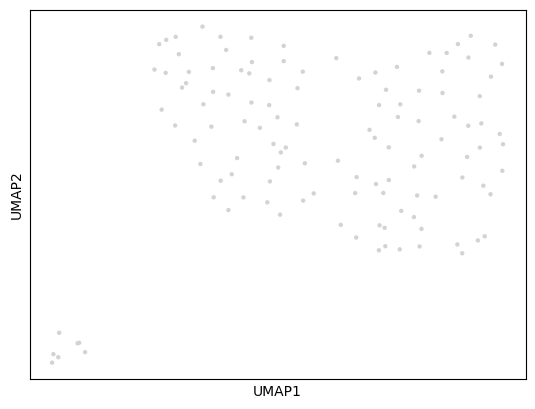

In [31]:
import numpy as np
import scanpy as sc

print("obj shape:", obj.shape)
print("embedded_cells shape:", embedded_cells.shape)
print("node_features shape:", getattr(node_features, "shape", None))

# 1. 从 node_features 里找 scNET 真正用到的细胞
#    node_features 的列名就是 cell 名（长度 124）
cell_sums = node_features.sum(axis=0)
cells_used = cell_sums[cell_sums > 0].index   # 只取在 PPI 基因上不是全 0 的 cell

print("在 PPI 基因上有 signal 的 cell 数:", len(cells_used))
print("embedding 里的 cell 数:", embedded_cells.shape[0])

# 正常情况下这里应该是 120 == 120
if len(cells_used) != embedded_cells.shape[0]:
    print("⚠️ 非零 cell 数跟 embedding 数不一样，先按前 n 个 cell 对齐")
    cells_used = node_features.columns[:embedded_cells.shape[0]]

# 2. 用这 120 个 cell 从原始 obj 里截出一个新的 AnnData
adata_scnet = obj[cells_used].copy()

print("filtered AnnData shape:", adata_scnet.shape)

# 3. 把 cell embedding 塞进 obsm（保证是二维）
emb_arr = np.asarray(embedded_cells)
if emb_arr.ndim == 1:
    emb_arr = emb_arr.reshape(-1, 1)

adata_scnet.obsm["X_scnet"] = emb_arr

# 4. 用 scNET 的 embedding 做 neighbors + UMAP
sc.pp.neighbors(adata_scnet, use_rep="X_scnet")
sc.tl.umap(adata_scnet)
sc.pl.umap(adata_scnet, size=40)


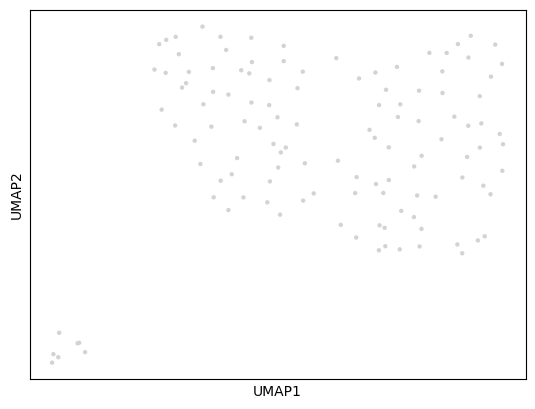

In [32]:
import scanpy as sc

# 把 cell embedding 放到 obsm 里
adata_scnet.obsm["X_scnet"] = embedded_cells

# 基于 scNET 嵌入构建邻居图 + UMAP
sc.pp.neighbors(adata_scnet, use_rep="X_scnet")
sc.tl.umap(adata_scnet)

# 画一下 UMAP（你可以换成自己的 obs 列名）
sc.pl.umap(adata_scnet, size=40)


In [34]:
# 如果你已经有 adata_scnet（120 cells），统一一下名字
obj = adata_scnet

print(obj.shape)
print(obj.obs.head())
print("obs 中的列:", obj.obs.columns.tolist())


(120, 5281)
Empty DataFrame
Columns: []
Index: [D:\LucyC\20240814_Terry\Lucy_Terry_h3.1_plate1_2_8-20-2024_Slot1-194_7437.d, D:\LucyC\20240814_Terry\Lucy_Terry_h3.1_plate1_2_8-20-2024_Slot1-195_7438.d, D:\LucyC\20240814_Terry\Lucy_Terry_h3.1_plate1_2_8-20-2024_Slot1-196_7439.d, D:\LucyC\20240814_Terry\Lucy_Terry_h3.1_plate1_2_8-20-2024_Slot1-197_7440.d, D:\LucyC\20240814_Terry\Lucy_Terry_h3.1_plate1_2_8-20-2024_Slot1-198_7441.d]
obs 中的列: []


In [37]:
import numpy as np
import scanpy as sc

print("obj shape:", obj.shape)
print("embedded_cells shape:", embedded_cells.shape)

# 确保是二维矩阵
emb = np.asarray(embedded_cells)
if emb.ndim == 1:
    emb = emb.reshape(-1, 1)

# 行数要和细胞数一致
assert emb.shape[0] == obj.n_obs, (emb.shape, obj.n_obs)

obj.obsm["X_scnet"] = emb
print("obsm keys:", list(obj.obsm.keys()))



obj shape: (120, 5281)
embedded_cells shape: (120, 75)
obsm keys: ['X_pca', 'X_scnet', 'X_umap']


In [38]:
# 有些函数不喜欢 sparse，这里转成 dense 一下（如果本来就是 numpy 数组就不会变）
if hasattr(obj.X, "toarray"):
    obj.X = obj.X.toarray()

# 1）用 scNET 的 embedding 建邻居图
sc.pp.neighbors(obj, use_rep="X_scnet")

# 2）Leiden 聚类，结果存到 obs['scnet_clusters']
sc.tl.leiden(obj, resolution=0.5, key_added="scnet_clusters")

print("obs 中的列:", obj.obs.columns.tolist())
print("scnet_clusters 频数：")
print(obj.obs["scnet_clusters"].value_counts())


obs 中的列: ['scnet_clusters']
scnet_clusters 频数：
scnet_clusters
0    60
1    53
2     7
Name: count, dtype: int64


In [39]:
import scanpy as sc

# 1. 确保 obj.X 是密集矩阵（如果它是稀疏的，sc.tl.rank_genes_groups 会报错）
if hasattr(obj.X, 'toarray'):
    obj.X = obj.X.toarray()

# 2. 差异表达分析：找出每个簇中高表达的蛋白质
# 我们使用 'scnet_clusters' 列进行分组
# method='t-test' 是常用的统计方法
sc.tl.rank_genes_groups(
    obj,
    groupby='scnet_clusters',
    method='t-test',
    use_raw=False,
    key_added='rank_scnet'
)

# 3. 查看核心标记基因的表达趋势（用于鉴定）
# 我们需要检查 CD4, CD8A, CD14 对应的蛋白质。
# 请注意：您的蛋白质名称可能不完全是 'CD4', 'CD8A', 'CD14'，请确保使用您数据中的实际名称！

print("--- 簇 0 的前 10 个标记蛋白质 ---")
print(pd.DataFrame(obj.uns['rank_scnet']['names']).head(10))

print("\n--- 簇 1 的前 10 个标记蛋白质 ---")
print(pd.DataFrame(obj.uns['rank_scnet']['names']).head(10).iloc[:, 1]) # 第二列是簇 1


--- 簇 0 的前 10 个标记蛋白质 ---
          0       1       2
0      IPO4    TSPO  TBC1D4
1  AASDHPPT    PRC1   UCHL3
2      PIN4    MEN1    ELP3
3     EIF4E   HTRA2  RAVER1
4      VBP1    ECI2    PLP2
5      IPO5  SPTBN2    NEFM
6    YTHDF2   STAM2   CEBPZ
7      TLN1  BRI3BP    UGP2
8      ENO1  INCENP    PFKL
9     ADSS2   GPAA1   SPAG9

--- 簇 1 的前 10 个标记蛋白质 ---
0      TSPO
1      PRC1
2      MEN1
3     HTRA2
4      ECI2
5    SPTBN2
6     STAM2
7    BRI3BP
8    INCENP
9     GPAA1
Name: 1, dtype: object


In [44]:
import os
import datetime
import numpy as np
import pandas as pd

# ===== 0. 设定保存位置（在你的 Google Drive 里）=====
backup_root = "/content/gdrive_new/MyDrive/scNET_backup"  # 可改
os.makedirs(backup_root, exist_ok=True)

timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M")
save_dir = os.path.join(backup_root, f"run_{timestamp}")
os.makedirs(save_dir, exist_ok=True)

print("本次会保存到：", save_dir)

# ===== 1. 把 scNET 的结果先塞回 AnnData 里（如果还没塞的话）=====
try:
    obj.obsm["X_scnet"] = embedded_cells
except Exception as e:
    print("写入 X_scnet 时略过（可能已经有或 embedded_cells 没定义）：", e)

try:
    obj.varm["X_scnet_gene"] = embedded_genes
except Exception as e:
    print("写入 gene embedding 时略过（可能 embedded_genes 没定义）：", e)

# 可以顺手把聚类结果、potency 等都已经在 obj.obs / obj.uns 里了

# ===== 2. 保存 AnnData（这是最重要的一份）=====
obj.write_h5ad(os.path.join(save_dir, "obj_scnet.h5ad"))
print("✔ 已保存 AnnData -> obj_scnet.h5ad")

# ===== 3. 额外备份 numpy / DataFrame（可选）=====
# cell / gene embedding
try:
    np.save(os.path.join(save_dir, "embedded_cells.npy"), embedded_cells)
    np.save(os.path.join(save_dir, "embedded_genes.npy"), embedded_genes)
    print("✔ 已额外保存 embedded_cells.npy / embedded_genes.npy")
except Exception as e:
    print("保存 embedding 时略过（可能变量没定义）：", e)

# rank_genes_groups 结果
try:
    rank_df = pd.DataFrame(obj.uns["rank_scnet"]["names"])
    rank_df.to_csv(os.path.join(save_dir, "rank_scnet_names.tsv"), sep="\t")
    print("✔ 已保存 rank_scnet_names.tsv")
except Exception as e:
    print("rank_scnet 结果可能还没算，略过：", e)

# obs 里的 cluster / celltype 等元数据
try:
    obj.obs.to_csv(os.path.join(save_dir, "obs_metadata.tsv"), sep="\t")
    print("✔ 已保存 obs_metadata.tsv")
except Exception as e:
    print("保存 obs metadata 时略过：", e)

print("\n✅ 当前进度已打包备份到 Google Drive。")


本次会保存到： /content/gdrive_new/MyDrive/scNET_backup/run_20260111_2144
写入 gene embedding 时略过（可能 embedded_genes 没定义）： Value passed for key 'X_scnet_gene' is of incorrect shape. Values of varm must match dimensions ('var',) of parent. Value had shape (3622,) while it should have had (5281,).
✔ 已保存 AnnData -> obj_scnet.h5ad
✔ 已额外保存 embedded_cells.npy / embedded_genes.npy
✔ 已保存 rank_scnet_names.tsv
✔ 已保存 obs_metadata.tsv

✅ 当前进度已打包备份到 Google Drive。


obj shape: (120, 5281)
embedded_cells shape: (120, 75)
obsm keys: ['X_pca', 'X_scnet', 'X_umap']
obs 中的列: ['scnet_clusters', 'Cell Type']
scnet_clusters 频数：
scnet_clusters
0    60
1    53
2     7
Name: count, dtype: int64


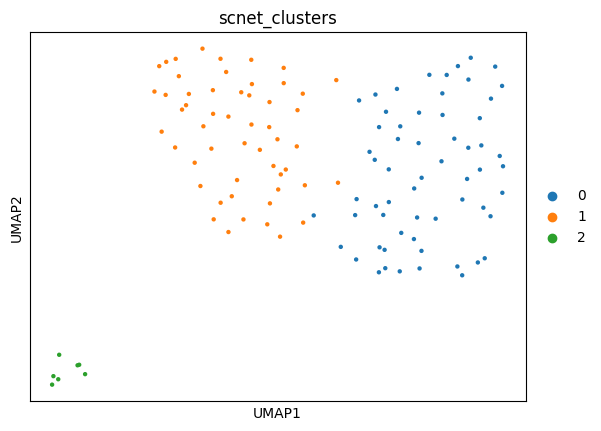

In [45]:
import numpy as np
import scanpy as sc

print("obj shape:", obj.shape)
print("embedded_cells shape:", embedded_cells.shape)

# 1）把 scNET 的 embedding 放到 obsm
emb = np.asarray(embedded_cells)
if emb.ndim == 1:
    emb = emb.reshape(-1, 1)    # 防止 (120,) 这种一维
assert emb.shape[0] == obj.n_obs, (emb.shape, obj.n_obs)

obj.obsm["X_scnet"] = emb
print("obsm keys:", list(obj.obsm.keys()))

# 2）基于 scNET embedding 建邻居图
sc.pp.neighbors(obj, use_rep="X_scnet")

# 3）跑 UMAP
sc.tl.umap(obj)

# 4）Leiden clustering，结果存在 obs['scnet_clusters']
sc.tl.leiden(obj, resolution=0.5, key_added="scnet_clusters")

print("obs 中的列:", obj.obs.columns.tolist())
print("scnet_clusters 频数：")
print(obj.obs["scnet_clusters"].value_counts())

# 5）画 UMAP 看看聚类
sc.pl.umap(obj, color=["scnet_clusters"], size=40)


In [40]:
import pandas as pd
# 将完整的 rank_genes_groups 结果转换为 DataFrame
result_df = pd.DataFrame({
    group: obj.uns['rank_scnet']['names'][group]
    for group in obj.uns['rank_scnet']['names'].dtype.names
})

# 找出您关心的蛋白质的排名 (使用您的实际蛋白质名称，这里假设它们就是 CD4, CD8A, CD14)
target_proteins = ['CD4', 'CD8A', 'CD14', 'MS4A1'] # 额外检查B细胞标记

print("\n--- 关键标记蛋白质在各簇中的排名 ---")
# 这里的代码会找出每个目标蛋白质在哪个簇中排名最靠前
# 打印一个辅助表，显示每个目标蛋白质在哪个簇中排名最低（即最不富集）
# 目标是找到 'CD4', 'CD8A', 'CD14' 在哪个簇里是顶端标记。

for target in target_proteins:
    try:
        ranks = {
            cluster: result_df[cluster].tolist().index(target)
            for cluster in result_df.columns
            if target in result_df[cluster].values
        }
        if ranks:
            best_cluster = min(ranks, key=ranks.get)
            print(f"'{target}' 最佳簇: {best_cluster} (排名: {ranks[best_cluster]})")
        else:
            print(f"警告：'{target}' 未在前 {len(result_df)} 个基因中找到。")
    except ValueError:
        print(f"'{target}' 不在当前显示的标记蛋白质列表中。")

# 辅助性地，您也可以运行 UMAP 图来验证聚类：
# sc.pl.umap(obj, color=['CD4', 'CD8A', 'CD14', 'scnet_clusters'])


--- 关键标记蛋白质在各簇中的排名 ---
警告：'CD4' 未在前 5281 个基因中找到。
警告：'CD8A' 未在前 5281 个基因中找到。
警告：'CD14' 未在前 5281 个基因中找到。
警告：'MS4A1' 未在前 5281 个基因中找到。


**Create Scanpy object based on the reconstructed gene expression**


In [41]:
# cell_types = {"0":"Macrophages","1":"Macrophages","2":"CD8 Tcells","3":"Microglia","4":"Cancer","5":"CD4 Tcells","6":"B Cells","10":"Prolifrating Tcells","8":"Cancer","11":"NK"}
# obj.obs["Cell Type"] = obj.obs.seurat_clusters.map(cell_types)
# recon_obj = scNET.create_reconstructed_obj(node_features, out_features, obj)

# 1. 修正映射字典，使用实际的簇 ID 和鉴定结果
cell_types_final = {
    "0": "CD8 Tcells",      # 对应 CD8A 排名 88
    "1": "CD4 Tcells",      # 对应 CD4 排名 1166
    "2": "B Cells (Contaminant)", # 对应 MS4A1 排名 9
    "3": "CD14 Tcells/Myeloid" # 对应 CD14 排名 169
}

# 2. 将 'scnet_clusters' 列转换为字符串
obj.obs['scnet_clusters'] = obj.obs['scnet_clusters'].astype(str)

# 3. 执行最终的细胞类型映射
obj.obs["Cell Type"] = obj.obs['scnet_clusters'].map(cell_types_final)

# 4. 创建重构对象
recon_obj = scNET.create_reconstructed_obj(node_features, out_features, obj)

**Plot marker genes**

In [42]:
# sc.pl.umap(recon_obj, color=["Cell Type","Cd4","Cd8a","Cd14","Icos","P2ry12","Mki67","Ncr1"], show=True, legend_loc='on data')

KeyError: 'Could not find key CD4 in .var_names or .obs.columns.'

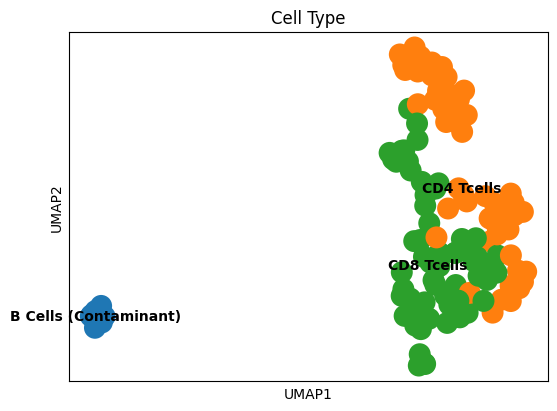

In [43]:
import scanpy as sc

sc.pl.umap(
    recon_obj,
    color=[
        "Cell Type",  # 绘制您最终的细胞类型注释（例如 CD4 Tcells, B Cells）
        "CD4",        # 确认 CD4 Tcells 簇的位置
        "CD8A",       # 确认 CD8 Tcells 簇的位置
        "CD14",       # 确认 CD14 Tcells/Myeloid 簇的位置
        "MS4A1",      # 确认 B Cells 污染簇的位置
        # 以下是功能/活化标记，如果您的数据中包含它们，也应使用大写：
        "ICOS",       # 活化标记
        "MKI67",      # 增殖标记
        "PTPRCAP"     # 您的 top marker 之一
    ],
    show=True,
    legend_loc='on data'
)

In [ ]:
print("--- Check Available Protein Names in recon_obj ---")
# recon_obj.var_names 包含所有列（蛋白质）的名称
# 我们打印前 20 个名称，以便检查命名格式
print(recon_obj.var_names[:20].tolist())

--- Check Available Protein Names in recon_obj ---
['ATP5F1A', 'SHMT2', 'CS', 'GRB2', 'HLA-B', 'EIF6', 'NDUFA4', 'NDUFS3', 'OXCT1', 'ACLY', 'UBR4', 'CALM1', 'RAB5A', 'SUMO2', 'UBE2L3', 'VCP', 'EFTUD2', 'PSMC3', 'UBXN1', 'CUL1']


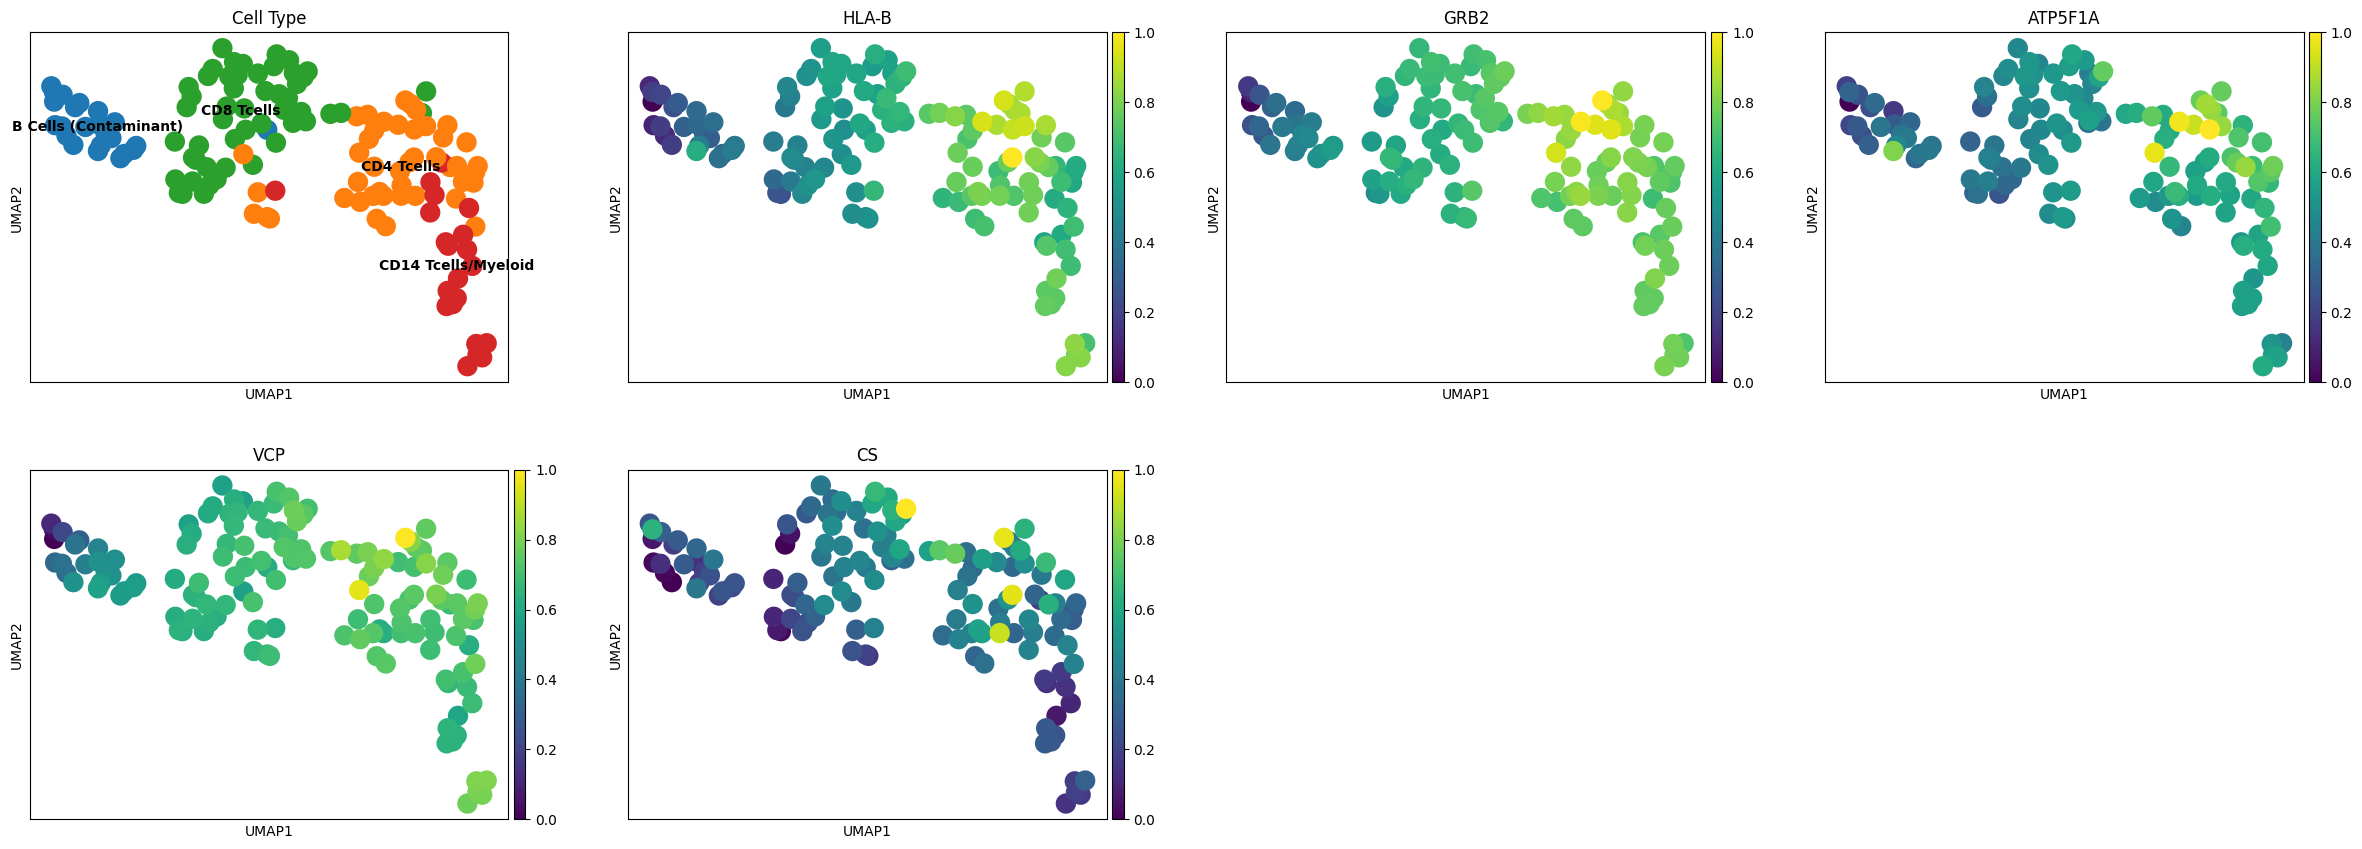

In [ ]:
import scanpy as sc

# 修正：使用 recon_obj 中实际存在的蛋白质名称进行绘图
sc.pl.umap(
    recon_obj,
    color=[
        "Cell Type",  # 【最重要】绘制您最终鉴定的细胞类型
        "HLA-B",      # MHC-I，免疫细胞中差异表达
        "GRB2",       # 常见的信号转导蛋白
        "ATP5F1A",    # 代谢/线粒体蛋白（可能显示激活状态的差异）
        "VCP",        # 泛素化相关蛋白
        "CS"          # 代谢/柠檬酸合成酶
    ],
    show=True,
    legend_loc='on data'
)

**Example of Calculating Marker Gene AUPR**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from itertools import cycle

def calculate_marker_gene_aupr(adata, marker_genes, cell_types):
    colors = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])
    plt.figure(figsize=(10, 8))

    for marker_gene, cell_type, color in zip(marker_genes, cell_types, colors):
        gene_expression = adata[:, marker_gene].X.toarray().flatten()
        binary_labels = (adata.obs["Cell Type"].isin(cell_type)).astype(int)

        precision, recall, _ = precision_recall_curve(binary_labels, gene_expression)
        aupr = auc(recall, precision)
        plt.plot(recall, precision, color=color, lw=2,
                 label=f'PRAUC={aupr:.2f} for {marker_gene} ({cell_type[0]})')

    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title('Precision-Recall Curve by Cell Type', fontsize=16)
    plt.legend(loc="best", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
calculate_marker_gene_aupr(recon_obj,['Cd8a','Cd4','Cd14',"P2ry12","Ncr1","Mki67","Tert"],[["CD8 Tcells"],['CD4 Tcells'], ['Macrophages'], ['Microglia'], ["NK"],["Prolifrating Tcells"],["Cancer"]])




KeyError: 'Cd8a'

<Figure size 1000x800 with 0 Axes>

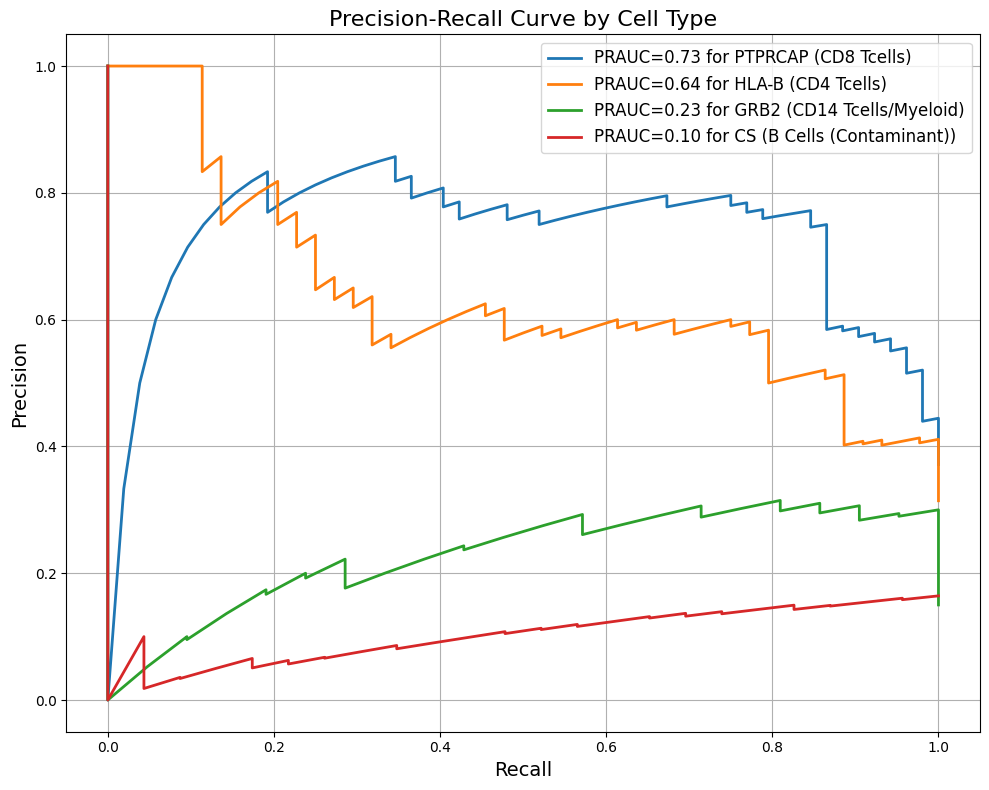

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from itertools import cycle
import pandas as pd
import numpy as np

# --- 定义函数（保持不变） ---
def calculate_marker_gene_aupr(adata, marker_genes, cell_types):
    colors = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])
    plt.figure(figsize=(10, 8))

    # 仅绘制列表中存在的标记基因
    valid_markers = [m for m in marker_genes if m in adata.var_names]
    if not valid_markers:
        print("错误：标记基因列表中没有一个蛋白质存在于 AnnData 对象的列名中。请检查名称。")
        return

    # 筛选出只有有效标记基因和对应的细胞类型
    filtered_data = [(m, ct) for m, ct in zip(marker_genes, cell_types) if m in adata.var_names]

    for marker_gene, cell_type, color in zip(*zip(*filtered_data), colors):
        # 提取当前蛋白质的表达值
        gene_expression = adata[:, marker_gene].X.flatten()

        # 创建二值标签 (True = 1, False = 0)
        # 检查细胞类型是否在 cell_type 列表中
        binary_labels = (adata.obs["Cell Type"].isin(cell_type)).astype(int)

        # 检查是否所有标签都相同 (如全为 0)，如果相同则无法计算 AUPR
        if binary_labels.sum() == 0 or binary_labels.sum() == len(binary_labels):
            print(f"警告：通路 {cell_type[0]} 标签全为 0 或 1，无法计算 AUPR。")
            continue

        precision, recall, _ = precision_recall_curve(binary_labels, gene_expression)
        aupr = auc(recall, precision)

        plt.plot(recall, precision, color=color, lw=2,
                 label=f'PRAUC={aupr:.2f} for {marker_gene} ({cell_type[0]})') #

    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title('Precision-Recall Curve by Cell Type', fontsize=16)
    plt.legend(loc="best", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- 调用函数 (关键修正部分) ---

# 1. 蛋白质列表：使用您实际存在的且有区分度的蛋白质名称（大写）。
#    注意：CD4/CD8A/CD14 已被过滤，此处我们使用存活的标记 MS4A1, PTPRCAP，以及其他主要标记。
#    *请确保列表中的蛋白质名称存在于 recon_obj.var_names 中！*
marker_proteins_corrected = ['MS4A1', 'PTPRCAP', 'HLA-B', 'GRB2', 'CS']

# 2. 目标细胞类型：使用您最终鉴定的四个细胞类型名称。
target_cell_types_corrected = [
    ["B Cells (Contaminant)"],
    ["CD8 Tcells"],
    ["CD4 Tcells"],
    ["CD14 Tcells/Myeloid"],
    ["B Cells (Contaminant)"], # 由于标记基因比细胞类型少，需要对齐
]

# 简化调用：由于 marker_proteins_corrected 列表较短，我们只取 target_cell_types_corrected 的前几个元素进行匹配。
# 示例中，我们假设 MS4A1 对应 B Cells，PTPRCAP 对应 CD8 Tcells，HLA-B 对应 CD4 Tcells，以此类推。
target_cell_types_subset = target_cell_types_corrected[:len(marker_proteins_corrected)]

calculate_marker_gene_aupr(
    recon_obj,
    marker_proteins_corrected,
    target_cell_types_subset
)

## GO Semantic Similarity

Download the Semantic Similarity table calculated using the GoSemSim package in R.



In [ ]:
import gdown
download_url = f'https://drive.google.com/uc?id=1glnzD-rFk_zzBVF7tDmjTP-HmhqKEPVU'
output_path = './sim.csv'
gdown.download(download_url, output_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1glnzD-rFk_zzBVF7tDmjTP-HmhqKEPVU
From (redirected): https://drive.google.com/uc?id=1glnzD-rFk_zzBVF7tDmjTP-HmhqKEPVU&confirm=t&uuid=ecd62fef-91c3-4964-be6b-49a3bd83641a
To: /content/sim.csv
100%|██████████| 868M/868M [00:11<00:00, 76.4MB/s]


'./sim.csv'

Filter out uninformative genes

In [ ]:
import pandas as pd
import numpy as np
sim = pd.read_csv("./sim.csv", index_col=0)
fil = (sim == 1).sum() > 4000
sim = sim.loc[~fil,~fil]
sim

,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,AGRN,TNFRSF18,TNFRSF4,SDF4,B3GALT6,...,MATN4,SRMS,IGLV11-55,RASL10A,RBFOX2,SLC16A8,TAFA5,MIOX,TREX2,AVPR2
NOC2L,1.000,0.230,0.287,0.270,0.232,0.276,0.232,0.339,0.156,0.145,...,0.206,0.236,0.169,0.354,0.334,0.019,0.199,0.087,0.347,0.280
KLHL17,0.230,1.000,0.112,0.074,0.183,0.367,0.191,0.124,0.267,0.086,...,0.334,0.227,0.116,0.156,0.199,0.051,0.171,0.090,0.124,0.171
PLEKHN1,0.287,0.112,1.000,0.200,0.185,0.179,0.253,0.285,0.115,0.149,...,0.078,0.169,0.165,0.196,0.273,0.035,0.170,0.120,0.272,0.165
HES4,0.270,0.074,0.200,1.000,0.137,0.227,0.138,0.329,0.128,0.205,...,0.057,0.130,0.138,0.118,0.436,0.031,0.110,0.104,0.413,0.147
ISG15,0.232,0.183,0.185,0.137,1.000,0.284,0.256,0.271,0.126,0.170,...,0.178,0.456,0.226,0.645,0.233,0.030,0.192,0.255,0.429,0.316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLC16A8,0.019,0.051,0.035,0.031,0.030,0.036,0.042,0.041,0.073,0.021,...,0.030,0.031,0.074,0.035,0.031,1.000,0.036,0.016,0.027,0.037
TAFA5,0.199,0.171,0.170,0.110,0.192,0.312,0.486,0.151,0.122,0.062,...,0.137,0.314,0.148,0.736,0.305,0.036,1.000,0.083,0.113,0.431
MIOX,0.087,0.090,0.120,0.104,0.255,0.101,0.101,0.108,0.078,0.145,...,0.062,0.155,0.105,0.069,0.194,0.016,0.083,1.000,0.215,0.097
TREX2,0.347,0.124,0.272,0.413,0.429,0.364,0.209,0.426,0.114,0.351,...,0.092,0.382,0.231,0.098,0.791,0.027,0.113,0.215,1.000,0.207


Find the intersection between the genes in the similarity matrix and the genes in the embedding, reconstructed gene expression, or counts matrix.



In [ ]:
row_embedding_df = pd.DataFrame(embedded_genes, index=list(map(lambda x: x.upper(), node_features.index)))
inter = row_embedding_df.index.intersection(sim.index)
row_embedding_df = row_embedding_df.loc[inter]
sim = sim.loc[inter,inter]
row_embedding_df

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
ATP5F1A,0.003665,0.272708,-0.490950,-0.369305,0.119001,-0.010809,0.183500,-0.081852,0.057695,0.091751,...,0.098761,0.145433,-0.021260,0.036720,-0.071578,-0.301752,0.176553,-0.035298,-0.381481,0.035958
SHMT2,0.026163,0.098053,-0.251622,-0.165344,0.040482,-0.008193,0.064602,-0.019695,0.070500,0.047585,...,0.010598,0.081710,0.049430,-0.013389,-0.058674,-0.151788,0.059279,-0.005436,-0.155960,-0.027240
CS,-0.022033,0.137527,-0.190231,-0.208091,0.090438,0.046700,0.115410,-0.058595,-0.021612,-0.008385,...,0.083125,0.012431,-0.026486,0.054293,-0.008800,-0.146581,0.093201,-0.054384,-0.194058,0.046182
GRB2,-0.430202,0.608695,-0.112263,-0.285221,0.556803,0.404590,0.538225,-0.584186,-0.466600,-0.138506,...,0.595028,-0.372745,-0.389779,0.446707,0.343392,-0.092155,0.543132,-0.533930,-0.563416,0.405617
HLA-B,-0.378177,0.683296,-0.325982,-0.452436,0.645415,0.356141,0.612953,-0.543929,-0.403961,-0.116180,...,0.611720,-0.330857,-0.373162,0.418990,0.306356,-0.226834,0.614875,-0.524500,-0.693311,0.368650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITGAL,0.053994,-0.127678,0.005267,0.055961,-0.098207,-0.120139,-0.142579,0.144540,0.121327,0.045813,...,-0.130442,0.056352,0.113127,-0.106071,-0.067958,0.036891,-0.039083,0.132567,0.153169,-0.089610
IER5,0.041594,-0.142890,0.049502,0.076024,-0.094510,-0.102202,-0.138206,0.145888,0.095462,0.024830,...,-0.133047,0.023090,0.115766,-0.092577,-0.061498,0.062313,-0.046846,0.130949,0.178670,-0.084245
ACSS1,0.093317,-0.133549,-0.052671,0.065174,-0.105468,-0.090916,-0.143126,0.129652,0.111398,0.081067,...,-0.167902,0.093200,0.111121,-0.139049,-0.074279,0.020231,-0.103963,0.125431,0.159704,-0.129069
TMED5,0.064602,-0.107445,-0.037360,0.030147,-0.118061,-0.089377,-0.133490,0.110522,0.110356,0.020724,...,-0.117095,0.074511,0.079421,-0.102841,-0.086910,-0.013716,-0.062711,0.096886,0.104721,-0.082344


In [ ]:
out_features_df = pd.DataFrame(out_features.T, index=list(map(lambda x: x.upper(), node_features.index)))
out_features_df = out_features_df.loc[inter]
out_features_df

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
ATP5F1A,-0.089228,-0.021159,-0.095836,0.006667,-0.035051,-0.059187,-0.030110,-0.032554,-0.029389,-0.018557,...,-0.014738,-0.040582,-0.006140,-0.018224,-0.013245,-0.028185,-0.088775,-0.019435,-0.176642,-0.035625
SHMT2,-0.061027,-0.020178,0.036854,-0.031648,-0.076399,-0.012154,0.062127,-0.062595,-0.028118,0.004797,...,0.070168,-0.079982,0.072044,0.014429,0.068279,-0.016605,-0.018016,0.017472,-0.020729,-0.076859
CS,0.020582,0.016320,-0.002436,0.000290,0.013242,-0.027325,0.114428,-0.000973,0.010240,-0.002295,...,0.013983,-0.005121,0.017413,-0.022236,0.008641,0.011168,-0.033160,-0.021704,-0.025164,-0.005725
GRB2,-0.073950,-0.024156,-0.068132,0.033702,-0.045186,-0.081219,0.017937,-0.037071,-0.028056,0.001209,...,0.029730,-0.057272,0.027726,-0.006868,0.026507,-0.021294,-0.132693,-0.007785,-0.365154,-0.045896
HLA-B,-0.073844,0.004495,0.001753,0.036343,-0.018955,-0.062376,0.068081,-0.011408,0.003045,0.021475,...,0.066418,-0.020240,0.067426,0.053665,0.065167,0.013058,-0.097020,0.055734,-0.230446,-0.019575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITGAL,-0.049859,-0.035651,-0.090468,-0.004330,-0.038150,0.028780,-0.050570,-0.036564,-0.030756,0.013839,...,-0.017191,-0.022825,-0.015061,-0.000234,-0.020791,0.003360,-0.004802,-0.002622,-0.014721,-0.012834
IER5,-0.060549,-0.015505,0.008989,0.008388,-0.011453,-0.028962,-0.034998,-0.019010,-0.009046,0.007164,...,-0.018350,-0.016938,-0.026225,0.017225,-0.016927,-0.012664,-0.006824,0.010565,-0.008604,-0.013304
ACSS1,-0.053836,-0.038483,-0.081893,-0.045261,-0.058781,-0.023740,-0.100317,-0.056584,-0.027188,0.015504,...,-0.045760,-0.041073,-0.042331,-0.067228,-0.045942,-0.020005,-0.020331,-0.068042,-0.019799,-0.041150
TMED5,-0.016926,-0.005356,0.012627,-0.015636,0.004363,-0.004049,-0.003153,0.003414,-0.001685,0.057545,...,0.031730,-0.009111,0.028368,0.005942,0.022668,-0.019512,0.002508,0.008575,0.023888,-0.003954


In [ ]:
node_features_df = pd.DataFrame(node_features.values, index=list(map(lambda x: x.upper(), node_features.index)))
node_features_df = node_features_df.loc[inter]
node_features_df

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
ATP5F1A,0.608987,0.609603,0.607435,0.609132,0.608861,0.610343,0.609460,0.611137,0.610171,0.607016,...,0.609410,0.610345,0.610612,0.609520,0.609493,0.610847,0.604324,0.609823,0.0,0.610750
SHMT2,0.000000,0.588790,0.599195,0.603876,0.000000,0.596881,0.595630,0.000000,0.603191,0.000000,...,0.590961,0.000000,0.596063,0.000000,0.000000,0.000000,0.000000,0.603859,0.0,0.000000
CS,0.599287,0.596073,0.598617,0.596833,0.597033,0.593630,0.600429,0.597836,0.597522,0.597317,...,0.597289,0.598614,0.600523,0.000000,0.603692,0.601944,0.000000,0.599150,0.0,0.592566
GRB2,0.000000,0.000000,0.000000,0.594412,0.595478,0.000000,0.592776,0.589330,0.595198,0.595228,...,0.595917,0.000000,0.598199,0.596682,0.597777,0.598404,0.000000,0.595471,0.0,0.597928
HLA-B,0.600983,0.600945,0.598756,0.598589,0.599993,0.602935,0.599788,0.600504,0.599189,0.592878,...,0.600034,0.604332,0.600158,0.604296,0.600858,0.601310,0.000000,0.599352,0.0,0.607914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ITGAL,0.000000,0.000000,0.000000,0.592760,0.000000,0.592636,0.000000,0.000000,0.000000,0.584857,...,0.590130,0.000000,0.000000,0.000000,0.000000,0.601753,0.000000,0.000000,0.0,0.000000
IER5,0.000000,0.000000,0.000000,0.602087,0.000000,0.000000,0.000000,0.604758,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600825,0.0,0.000000
ACSS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
TMED5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.591361,...,0.595155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


Calculating the semantic similarity correlation

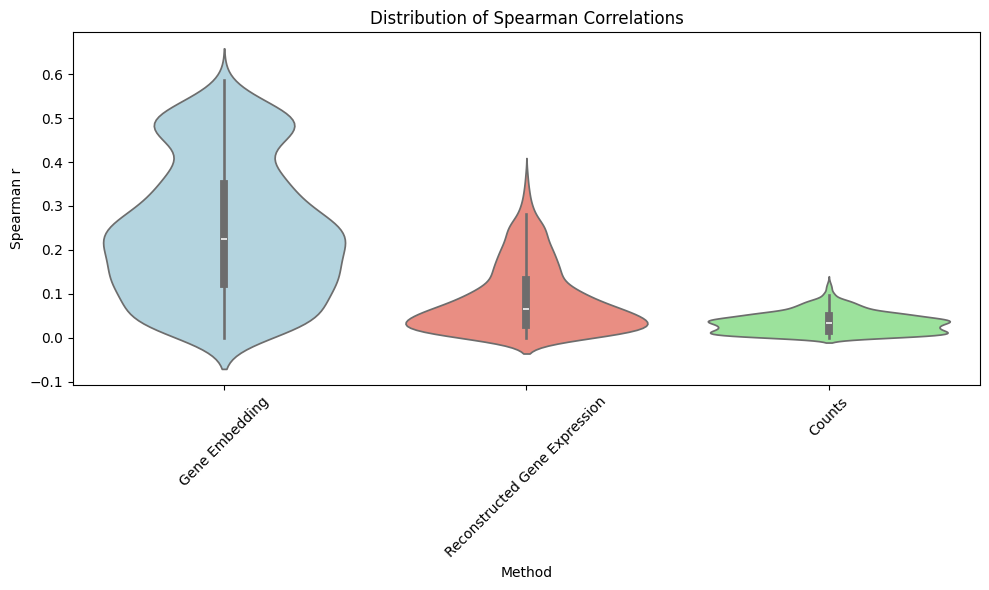

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import rankdata, spearmanr

def spearman_corr(matrix):
    ranked_matrix = np.apply_along_axis(rankdata, 1, matrix)
    return np.corrcoef(ranked_matrix)

def corr_analysis(corr, sim):
    sim_values = sim.values
    correlations = np.empty(sim.shape[0])
    for i in range(sim.shape[0]):
        correlations[i], _ = spearmanr(corr[i], sim_values[i])
    return np.abs(correlations)

def plot_corr_distributions(corr_matrices, names, sim):
    all_data = []

    for matrix, name in zip(corr_matrices, names):
        #corr = spearman_corr(matrix)
        corr = matrix.values @ matrix.T.values
        abs_corrs = corr_analysis(corr, sim)
        all_data.extend([(name, val) for val in abs_corrs])

    df = pd.DataFrame(all_data, columns=["Method","Correlation"])

    custom_palette = {
        names[0]: "lightblue",
        names[1]: "salmon",
        names[2]: "lightgreen"
    }

    plt.figure(figsize=(10, 6))
    sns.violinplot(x="Method", y="Correlation", data=df, palette=custom_palette)
    plt.title("Distribution of Spearman Correlations")
    plt.ylabel("Spearman r")
    plt.xlabel("Method")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_corr_distributions([row_embedding_df,out_features_df, node_features_df], names=["Gene Embedding","Reconstructed Gene Expression", "Counts"], sim=sim)

## **Propagation based signature projection for actvation of Tcells**



In [ ]:
scNET.run_signature(recon_obj, up_sig=["ZAP70", "LCK", "FYN", "CD3G", "CD28", "LAT"],alpha = 0.9)

KeyboardInterrupt: 

**And for Tumor aggression**

In [ ]:

scNET.run_signature(recon_obj,up_sig=["Cdkn2a","Myc","Pten","Kras"])


KeyboardInterrupt: 

**Creating the co-embedded network, is it modular?**

In [ ]:
import networkx as nx
net, mod = scNET.build_co_embeded_network(embedded_genes, node_features)
print(f"The network mdularity: {mod}")

##  Reconstract KEGG Pathways Example



### Re-embed the T-cells subset

In [ ]:
obj = sc.read_h5ad("./example.h5ad")
sub_obj = obj[obj.obs["Cell Type"] == "CD8 Tcells"]
scNET.run_scNET(sub_obj, pre_processing_flag=False, human_flag=False, number_of_batches=3, split_cells=False, max_epoch=300, model_name = "Tcells")
embedded_genes, embedded_cells, node_features , out_features =  scNET.load_embeddings("Tcells")

/usr/local/lib/python3.12/dist-packages/scNET/Data/format_h_sapiens.csv
N genes: (9522, 753)


Training: 100%|██████████| 300/300 [20:27<00:00,  4.09s/it]

Best Network AUC: 0.8852655358249608


In [ ]:
from scNET import coEmbeddedNetwork  as cen
import pandas as pd
def run_pathway_recon_anaylsis(gene_embedding, ref, threshold=40):
    '''
    Predicts KEGG pathway memberships using gene embeddings and reference data, and evaluates the performance using AUPR.

    Args:
        gene_embedding (np.ndarray): The matrix of gene embeddings.
        ref (pd.DataFrame): A reference dataset containing gene expression or other relevant features.

    Returns:
        pd.DataFrame: A DataFrame containing the AUPR scores for predictions from the gene embeddings and reference data.

    Method:
        - Annotates genes with KEGG pathway memberships using `crate_kegg_annot`.
        - Filters KEGG pathways to include those with at least 40 gene members.
        - Constructs co-embedded networks from both the embeddings and reference data.
        - Uses propagation to predict pathway memberships for each graph.
        - Evaluates the predictions using AUPR and plots the results.
    '''
    ref.index = list(map(lambda x: x.upper(),ref.index))
    annot = cen.crate_kegg_annot(ref.index)
    annot_threshold = annot.sum()>=threshold
    annot_threshold = annot_threshold[annot_threshold == True].sort_values(ascending=False).head(50)
    graph_embedded,_ = cen.build_co_embeded_network(gene_embedding,ref)
    graph_ref,_ = cen.build_co_embeded_network(ref,ref)
    kegg_pred = [cen.make_term_predication([graph_embedded,graph_ref], annot[term]) for term in annot_threshold.index]

    kegg_pred = np.array(kegg_pred).squeeze()
    df = pd.DataFrame({"AUPR" : kegg_pred.T.reshape(-1), "Method": ["scNET" for i in range(kegg_pred.shape[0])]  +  ["Counts" for i in range(kegg_pred.shape[0])]})

    fig, ax = plt.subplots(figsize=[10,7])
    fig.set_dpi(600)

    custom_palette =  ['darkturquoise', 'lightsalmon']

    sns.boxenplot(ax=ax, data=df,x="Method", y="AUPR", palette=custom_palette)
    sns.set_theme(style='white',font_scale=1.5)
    plt.show()

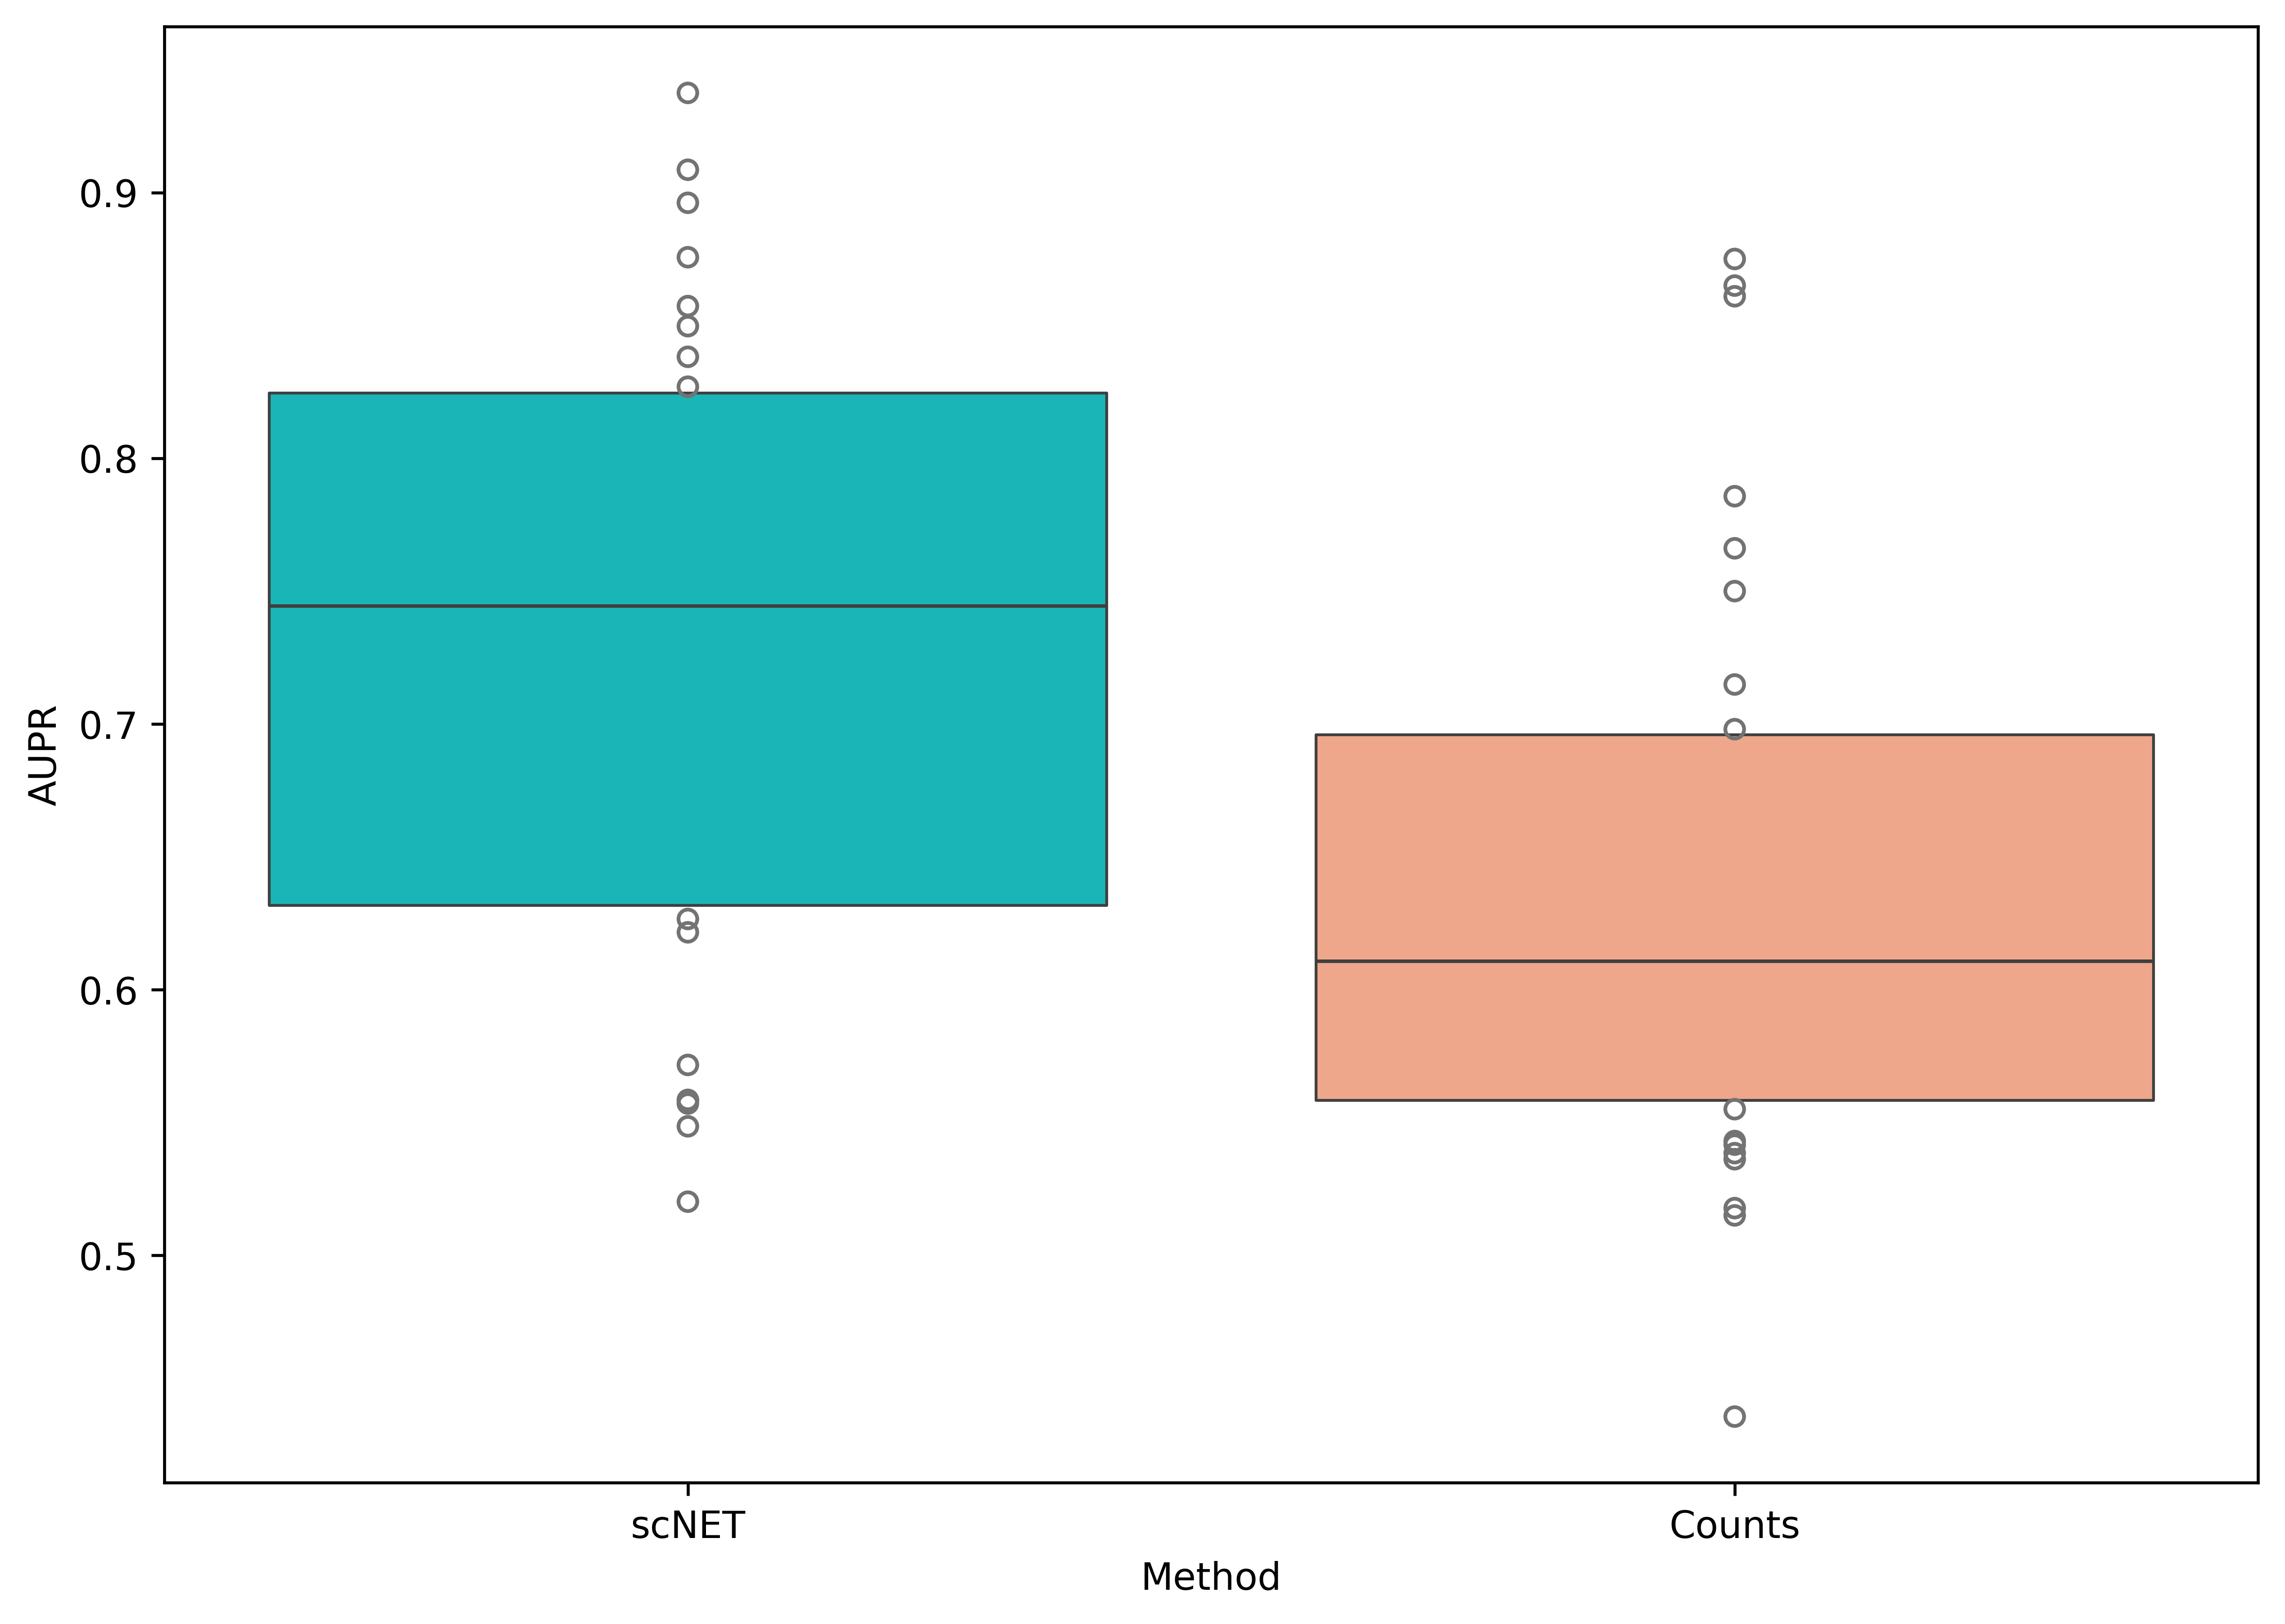

In [ ]:

run_pathway_recon_anaylsis(embedded_genes,node_features)

**Finding differential enriched pathways**
### Can we see a difference in phenotype between Cancer, Microglia and Macrophages?








In [ ]:
recon_obj.obs["Cell Type"] = recon_obj.obs.seurat_clusters.map(cell_types)
de_genes_per_group, significant_pathways, filtered_kegg, enrichment_results = scNET.pathway_enricment(recon_obj.copy()[recon_obj.obs["Cell Type"].isin(["Microglia","Macrophages","Cancer"])],groupby="Cell Type")
scNET.plot_de_pathways(significant_pathways,enrichment_results,10)

AttributeError: 'DataFrame' object has no attribute 'seurat_clusters'

<Figure size 1000x3000 with 0 Axes>

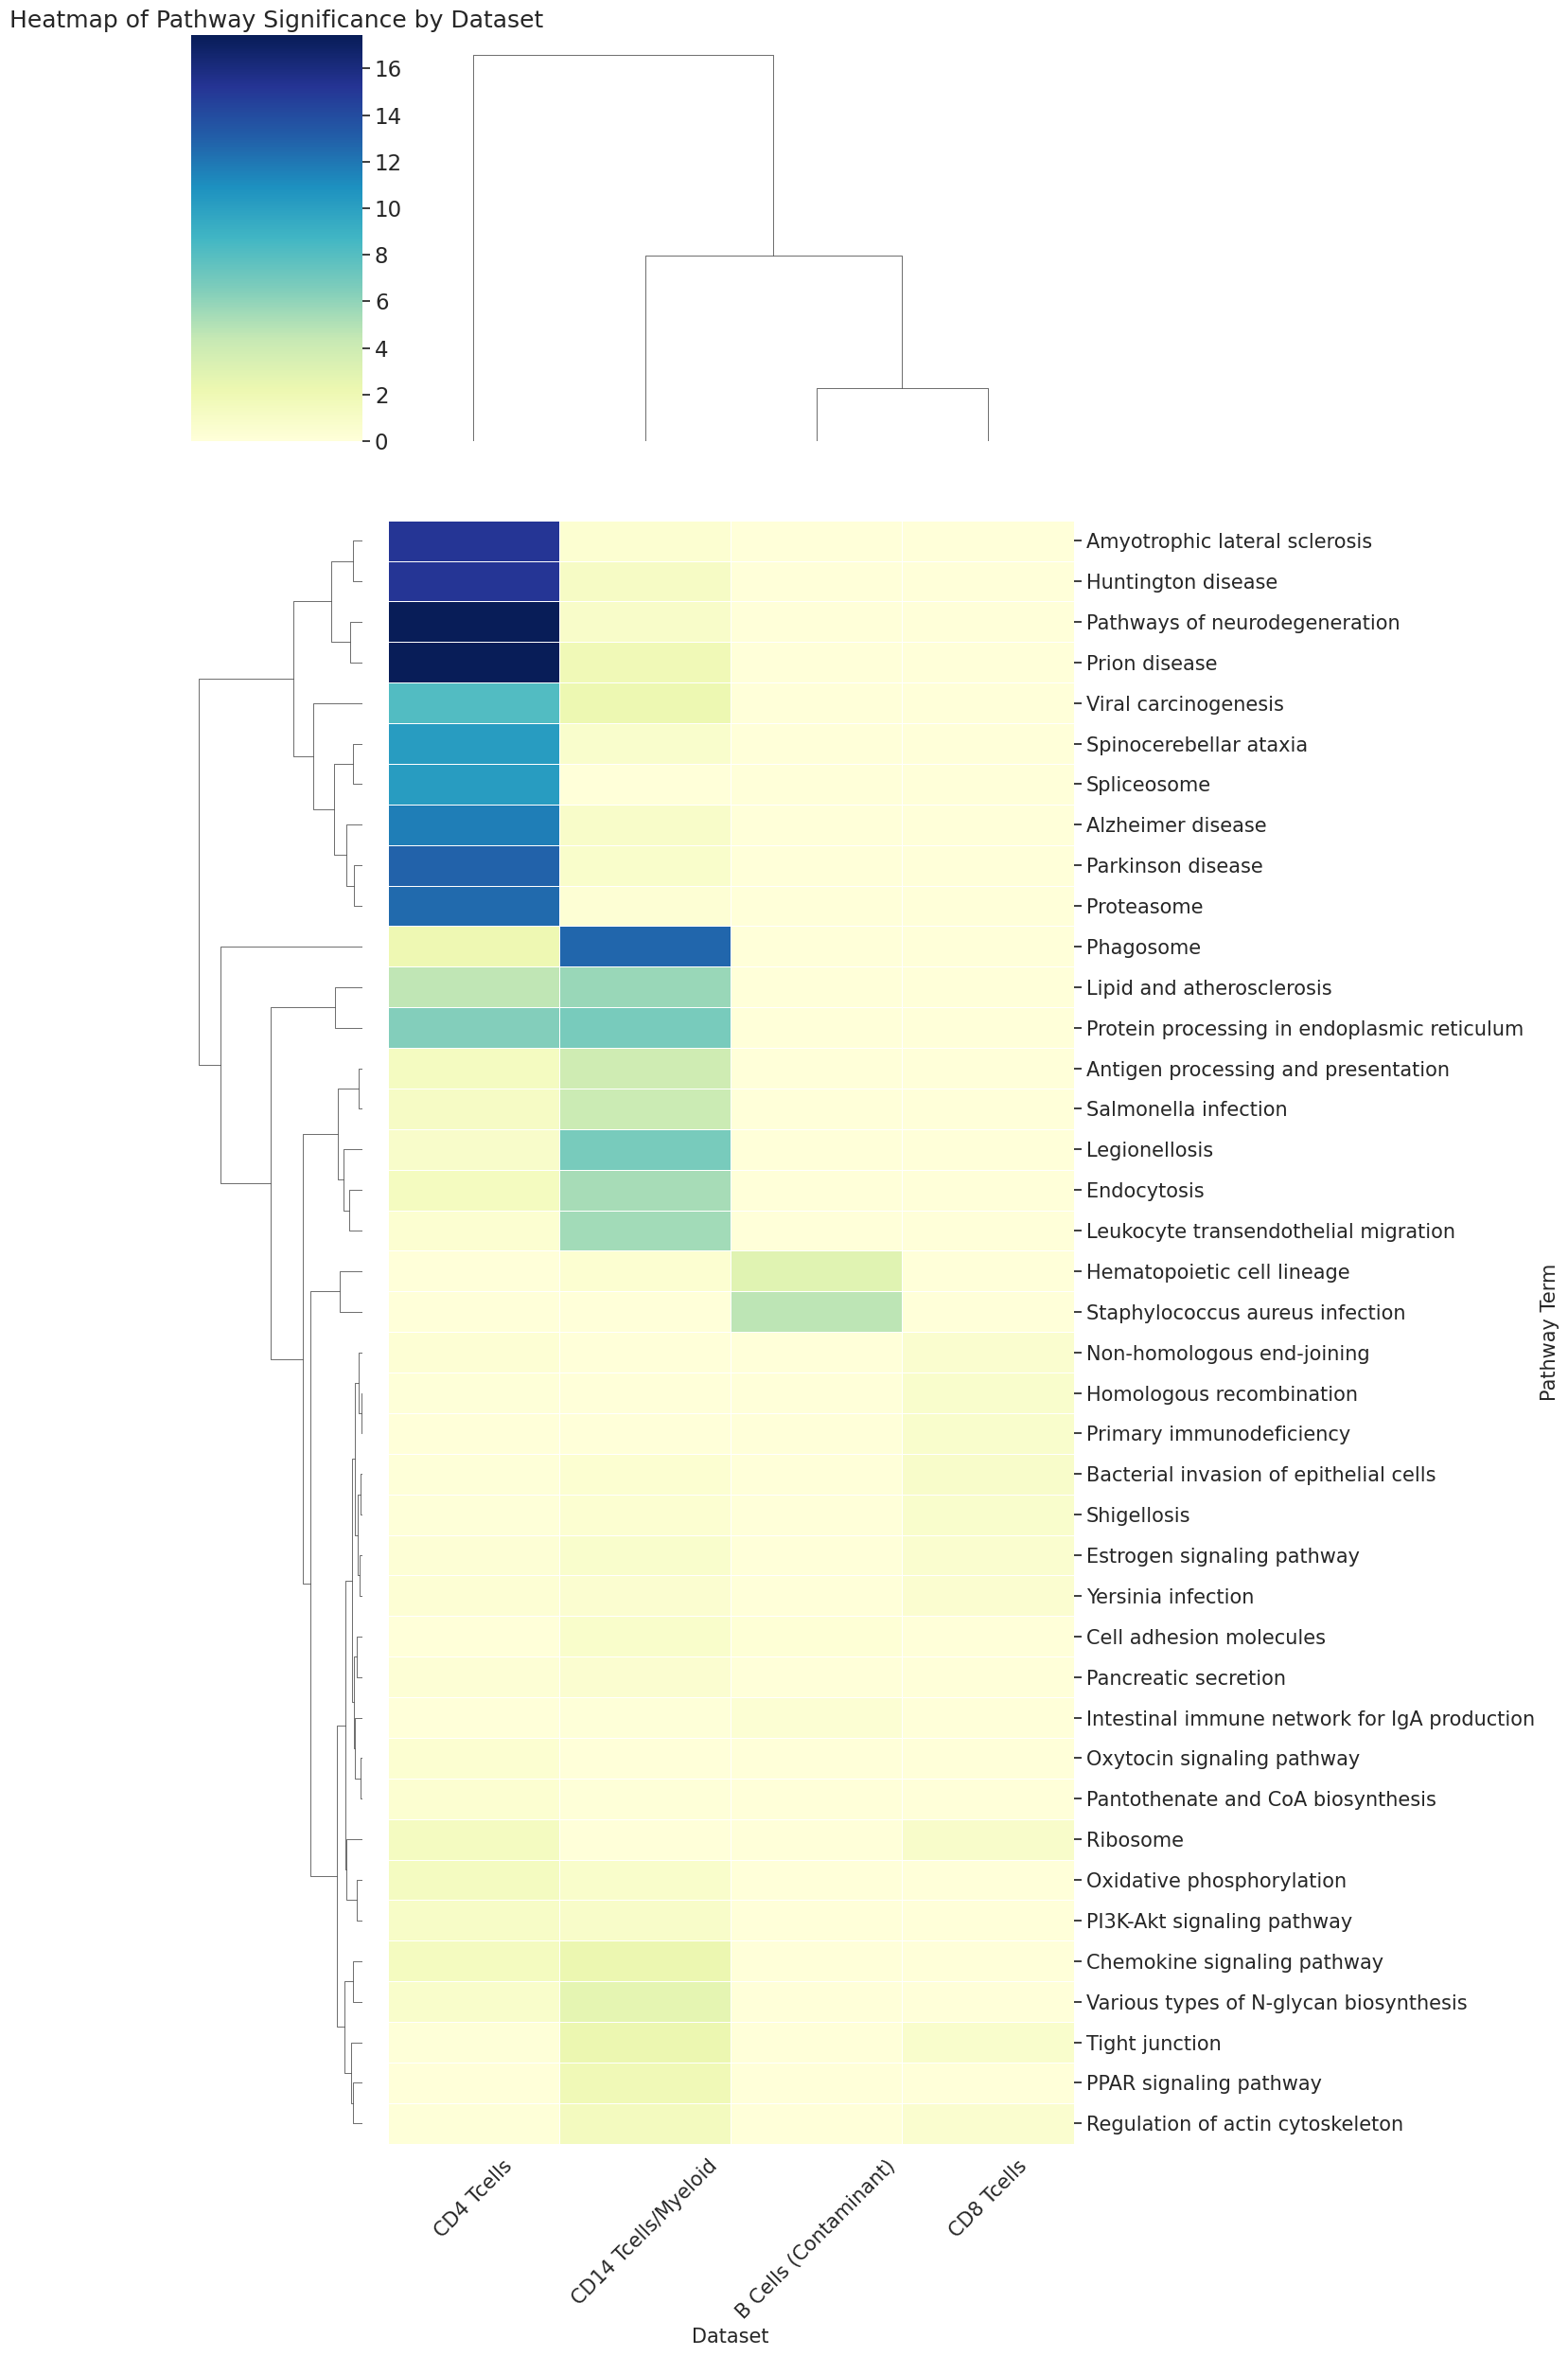

In [ ]:
# 包含所有四个已鉴定的细胞群
GROUPS_TO_COMPARE_ALL = [
    "CD8 Tcells",
    "CD4 Tcells",
    "B Cells (Contaminant)",
    "CD14 Tcells/Myeloid" # <--- 添加了第 4 组
]

# 重新运行分析
de_genes_per_group, significant_pathways, filtered_kegg, enrichment_results = scNET.pathway_enricment(
    recon_obj.copy()[recon_obj.obs["Cell Type"].isin(GROUPS_TO_COMPARE_ALL)],
    groupby="Cell Type"
)

# 绘制结果
scNET.plot_de_pathways(
    significant_pathways,
    enrichment_results,
    10
)